In [79]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [80]:
X_digits, y_digits = datasets.load_digits(return_X_y=True)

In [96]:
pca = PCA(n_components = 64)

# Fit PCA on training set only
pca.fit(X_digits)

PCA(n_components=64)

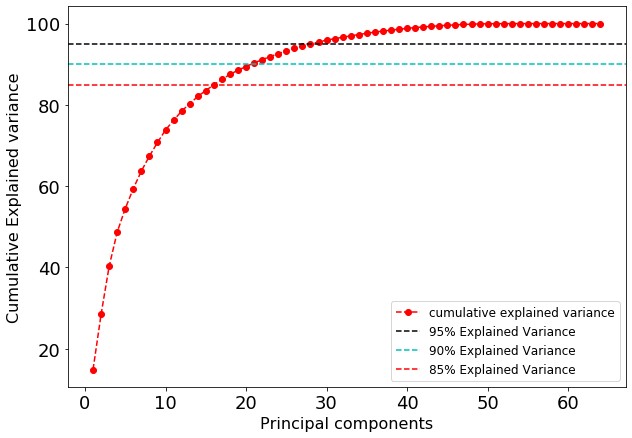

In [99]:
# Summing explained variance
tot = sum(pca.explained_variance_)

var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)] 

# Cumulative explained variance
cum_var_exp = np.cumsum(var_exp)

# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7));
ax.tick_params(labelsize = 18)
ax.plot(range(1, 65), cum_var_exp,"r--o", label='cumulative explained variance')
ax.set_ylabel('Cumulative Explained variance', fontsize = 16)
ax.set_xlabel('Principal components', fontsize = 16)
ax.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
ax.axhline(y = 90, color='c', linestyle='--', label = '90% Explained Variance')
ax.axhline(y = 85, color='r', linestyle='--', label = '85% Explained Variance')
ax.legend(loc='best', markerscale = 1.0, fontsize = 12)

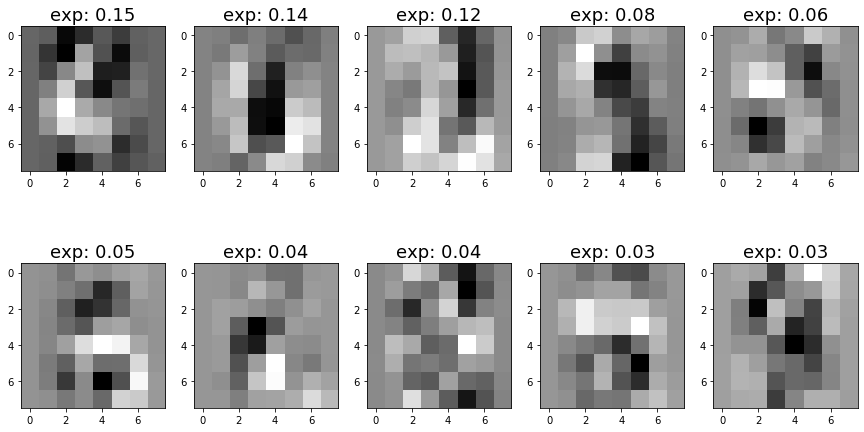

In [92]:
plt.figure(figsize=(15,8))
for index in range(0, 10):

    plt.subplot(2, 5, 1 + index )
    plt.imshow(pca.components_[index,:].reshape(8,8), cmap ='gray')
    plt.title('exp: ' + str(round(pca.explained_variance_ratio_[index],2)), fontsize = 18)

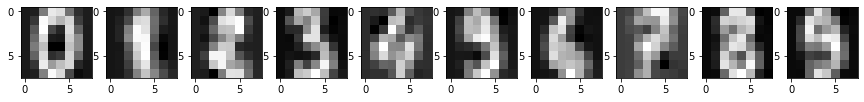

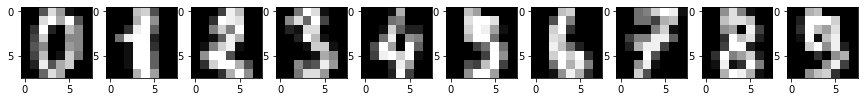

In [93]:
rec = pca.inverse_transform(pca.transform(X_digits))

plt.figure(figsize=(15,8))
for index in range(0, 10):

    plt.subplot(1, 10, 1 + index )
    plt.imshow(rec[index,:].reshape(8,8), cmap ='gray')
     
    
plt.figure(figsize=(15,8))
for index in range(0, 10):
    
    plt.subplot(1, 10, 1 + index )
    plt.imshow(X_digits[index,:].reshape(8,8), cmap ='gray')
    #plt.title('exp: ' + str(round(pca.explained_variance_ratio_[index],2)), fontsize = 18)

In [100]:
# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
pca = PCA()
# Define a Standard Scaler to normalize inputs
scaler = StandardScaler()

# set the tolerance to a large value to make the example faster
logistic = LogisticRegression(max_iter=10000, tol=0.1,solver='liblinear',
                         multi_class='ovr')
pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("logistic", logistic)])

In [101]:
sum(pca_test.explained_variance_ratio_)

0.9416675036476609

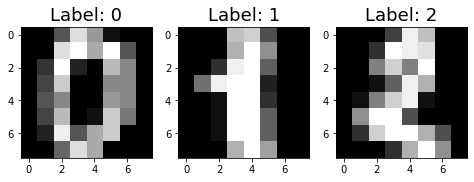

In [102]:
plt.figure(figsize=(8,4))
for index in range(0, 3):

    plt.subplot(1, 3, 1 + index )
    plt.imshow(X_digits[index,:].reshape(8,8), cmap ='gray')
    plt.title('Label: ' + str(y_digits[index]), fontsize = 18)

In [103]:
# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    "pca__n_components": [5, 15, 30, 45, 60],
    "logistic__C": np.logspace(-4, 4, 4),
}
search = GridSearchCV(pipe, param_grid, n_jobs=2)
search.fit(X_digits, y_digits)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.914):
{'logistic__C': 21.54434690031882, 'pca__n_components': 60}


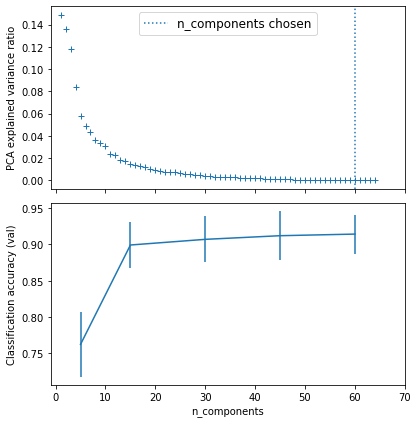

In [104]:
# Plot the PCA spectrum
pca.fit(X_digits)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(
    np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, "+", linewidth=2
)
ax0.set_ylabel("PCA explained variance ratio")

ax0.axvline(
    search.best_estimator_.named_steps["pca"].n_components,
    linestyle=":",
    label="n_components chosen",
)
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = "param_pca__n_components"
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, "mean_test_score")
)

best_clfs.plot(
    x=components_col, y="mean_test_score", yerr="std_test_score", legend=False, ax=ax1
)
ax1.set_ylabel("Classification accuracy (val)")
ax1.set_xlabel("n_components")

plt.xlim(-1, 70)

plt.tight_layout()
plt.show()